In [4]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.display import Audio
%matplotlib inline
sns.set_style("ticks")

In [10]:
def plot_stft(sig):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear');

In [11]:
def plot_mel_specgtrogram(y):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr);



In [12]:
def plot_dft(sig, win_len=1024):
    window = np.hamming(win_len)
    sig = window * sig[:win_len]
    D = np.abs(np.fft.fft(sig))[:win_len//2]
    xs = np.arange(win_len/2) * (22050/win_len)
    plt.plot(xs, D)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [7]:
def extract_mfccs(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return np.concatenate([
        mfccs.mean(axis=1),
        mfccs.std(axis=1)
    ])

def extract_chroma(y, sr):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.concatenate([
        chroma.mean(axis=1),
        chroma.std(axis=1)
    ])

def extract_feats(y, sr):
    chroma = extract_chroma(y, sr)
    mfccs = extract_mfccs(y, sr)
    feats = np.concatenate([chroma, mfccs])
    
    labels = []   
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_mean'.format(i))
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_std'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_mean'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_std'.format(i))
        
    return feats, labels

def feats_for_fname(fname):
    y, sr = librosa.core.load(fname)
    return extract_feats(y, sr)

def fname_generator(genre):
    #for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/genres'):
    for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/Audios/genres'):    
        for file in files:
            if file.endswith('.wav') and genre in file:
                yield os.path.join(root, file)         
                
def df_for_genre(genre):
    fnames = []
    feats = []
    for fname in fname_generator(genre):
        # print("extracting feats for {}".format(fname))
        cur_feats, labels = feats_for_fname(fname)
        fnames.append(fname)
        feats.append(cur_feats)
    df = pd.DataFrame(feats, columns=labels, index=fnames)
    df['label'] = genre
    return df

In [8]:
#data = pd.concat([df_for_genre(genre) for genre in ['pop', 'classical']])
#data = pd.concat([df_for_genre(genre) for genre in ['Meow', 'Bark']])
data = pd.concat([df_for_genre(genre) for genre in ['Meow', 'Laughter']])

In [9]:
data

,chroma_0_mean,chroma_1_mean,chroma_2_mean,chroma_3_mean,chroma_4_mean,chroma_5_mean,chroma_6_mean,chroma_7_mean,chroma_8_mean,chroma_9_mean,...,mfcc_11_std,mfcc_12_std,mfcc_13_std,mfcc_14_std,mfcc_15_std,mfcc_16_std,mfcc_17_std,mfcc_18_std,mfcc_19_std,label
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.13903b82.wav,0.358409,0.310771,0.289265,0.377811,0.558970,0.674733,0.578180,0.369109,0.438358,0.450149,...,6.558631,8.967517,8.024698,8.256818,8.161858,7.931644,6.763131,6.953437,6.853629,Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.14ef39a2.wav,0.747842,0.775714,0.797979,0.763500,0.680019,0.682310,0.715546,0.723590,0.692574,0.694708,...,7.050645,11.785848,12.657193,4.004518,4.469872,5.278027,2.794871,4.640044,6.431062,Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.170946f3.wav,0.536623,0.511867,0.294202,0.268477,0.315186,0.451499,0.603730,0.347635,0.383415,0.417399,...,8.359413,12.617321,12.967242,6.690929,8.568589,5.568303,9.182730,7.620800,13.071231,Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.1760ba6f.wav,0.383218,0.341732,0.297895,0.250340,0.275220,0.302135,0.377134,0.590969,0.252815,0.360732,...,18.256390,12.722591,11.279243,20.263004,5.100071,11.837655,4.956413,13.296735,15.169248,Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.19fc7498.wav,0.453662,0.458904,0.466918,0.459724,0.509575,0.545305,0.582163,0.666447,0.679695,0.642427,...,5.845356,6.438216,3.249340,5.214206,4.546913,5.590647,6.470788,10.328273,18.334713,Meow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.b3d33a56.wav,0.366180,0.425758,0.418458,0.417386,0.418728,0.429951,0.409132,0.395419,0.415848,0.358089,...,7.883541,8.394190,9.218209,7.643392,7.445305,8.682100,7.733833,6.880165,7.377859,Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.b53cd227.wav,0.385984,0.418869,0.447448,0.522550,0.505730,0.575125,0.620607,0.665433,0.618574,0.511532,...,6.621626,9.108629,11.390288,8.936391,5.909692,4.984245,5.879902,5.223012,6.489824,Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.b55f29ee.wav,0.198210,0.161446,0.177991,0.216957,0.303148,0.279897,0.299180,0.319984,0.293962,0.287420,...,9.358771,10.530272,13.215320,16.842403,19.922100,20.953274,18.859478,14.098907,20.494148,Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.b58b18ec.wav,0.157116,0.229694,0.370420,0.415172,0.412259,0.671576,0.720288,0.579865,0.569568,0.341467,...,4.583373,5.024926,5.298118,8.761751,7.620055,10.805368,16.183771,11.587960,8.528158,Laughter


In [10]:
y = data['label']
X = data.drop('label', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [14]:
y_pred = pipeline.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.8131868131868132

In [16]:
y_test

/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9deab5af.wav    Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.1fac40bb.wav                Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.00ad7068.wav    Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.d9f07bed.wav                Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.6af97eab.wav    Laughter
                                                                                      ...   
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9f0e3750.wav    Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.392882a3.wav                Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.ffbba18f.wav    Laughter
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.eae18f5e.wav                Meow
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.00

In [17]:
y_pred

array(['Laughter', 'Meow', 'Laughter', 'Laughter', 'Meow', 'Meow', 'Meow',
       'Laughter', 'Meow', 'Laughter', 'Meow', 'Laughter', 'Laughter',
       'Laughter', 'Meow', 'Laughter', 'Laughter', 'Laughter', 'Meow',
       'Laughter', 'Meow', 'Laughter', 'Meow', 'Laughter', 'Laughter',
       'Laughter', 'Laughter', 'Laughter', 'Laughter', 'Laughter',
       'Laughter', 'Laughter', 'Laughter', 'Laughter', 'Laughter',
       'Laughter', 'Laughter', 'Laughter', 'Meow', 'Laughter', 'Laughter',
       'Laughter', 'Meow', 'Meow', 'Laughter', 'Laughter', 'Laughter',
       'Laughter', 'Laughter', 'Meow', 'Laughter', 'Laughter', 'Laughter',
       'Laughter', 'Laughter', 'Laughter', 'Laughter', 'Laughter', 'Meow',
       'Meow', 'Laughter', 'Meow', 'Laughter', 'Laughter', 'Laughter',
       'Meow', 'Laughter', 'Laughter', 'Laughter', 'Laughter', 'Laughter',
       'Laughter', 'Laughter', 'Laughter', 'Meow', 'Meow', 'Laughter',
       'Laughter', 'Laughter', 'Laughter', 'Meow', 'Meow', 'Laugh

In [18]:
y_pred != y_test


/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9deab5af.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.1fac40bb.wav            False
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.00ad7068.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.d9f07bed.wav             True
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.6af97eab.wav     True
                                                                                    ...  
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9f0e3750.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.392882a3.wav            False
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.ffbba18f.wav     True
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.eae18f5e.wav            False
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.00c934d7.wav    False
Name: labe

In [19]:
y_pred_test_wrong = (y_pred != y_test)
y_pred_test_right = (y_pred == y_test)

In [20]:
type(y_pred_test_wrong)

pandas.core.series.Series

In [21]:
df = y_pred_test_wrong.to_frame()

In [22]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

df


,label
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9deab5af.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.1fac40bb.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.00ad7068.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.d9f07bed.wav,True
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.6af97eab.wav,True
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.9c0cf859.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.b1e3de31.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.5aa8b633.wav,True
/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.d9b38f26.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.0cbfebc7.wav,False


In [24]:
# PlAY True/FALSE identifications
for t in df.index[0:1]:
    print(t)
    y, sr = librosa.core.load(t)
    
Audio(data=y, rate=sr)

/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9deab5af.wav


In [396]:
df_wrong = y_pred_test_wrong.to_frame()
df_right = y_pred_test_right.to_frame()

In [33]:
# Laughter predicted as laughter
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.9deab5af.wav')
Audio(data=y, rate=sr)

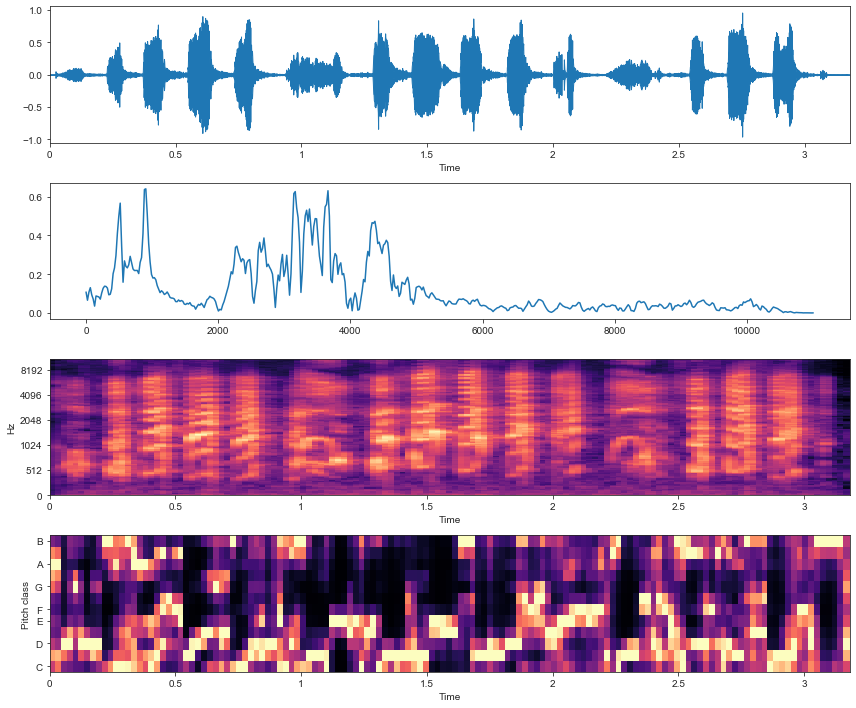

In [28]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [15]:
# Cat predicted as cat.
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.1fac40bb.wav')
Audio(data=y, rate=sr)

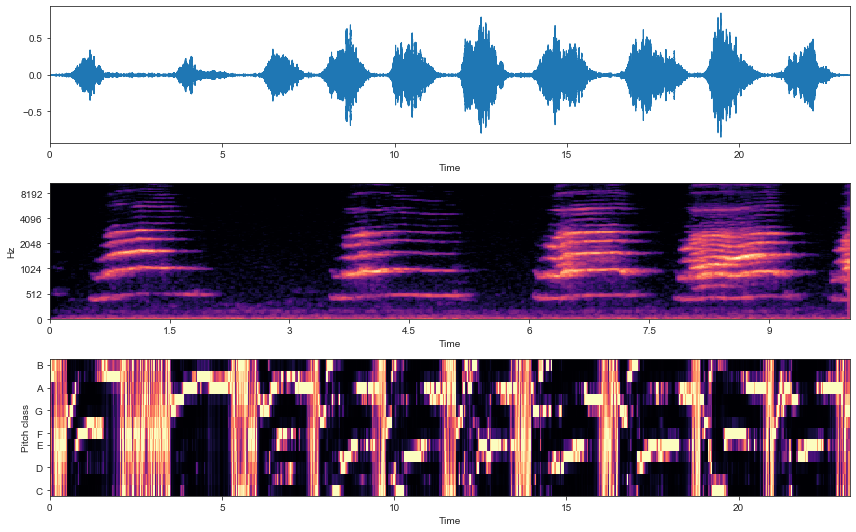

In [17]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

# plt.subplot(5, 1, 2)
# plot_dft(y[sr*0:])
# #plt.colorbar(format='%+2.0f dB')
# #plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

plt.savefig('cat')

In [31]:
# Cat predicted as Laughter
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.4ccf85c8.wav')
Audio(data=y, rate=sr)

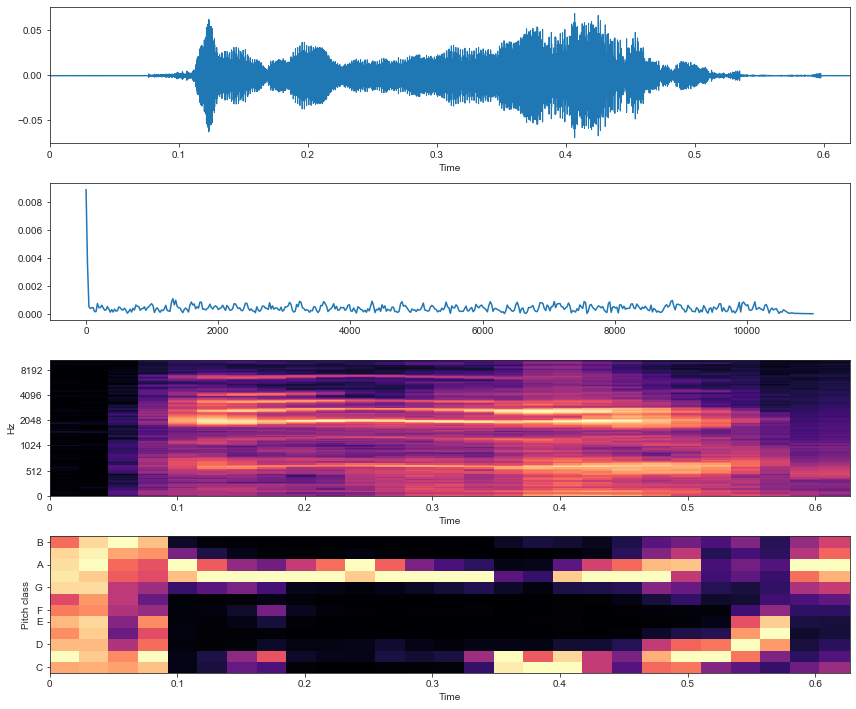

In [32]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [34]:
# Laughter predicted as cat 
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Laughter/Laughter.b58b18ec.wav')
Audio(data=y, rate=sr)

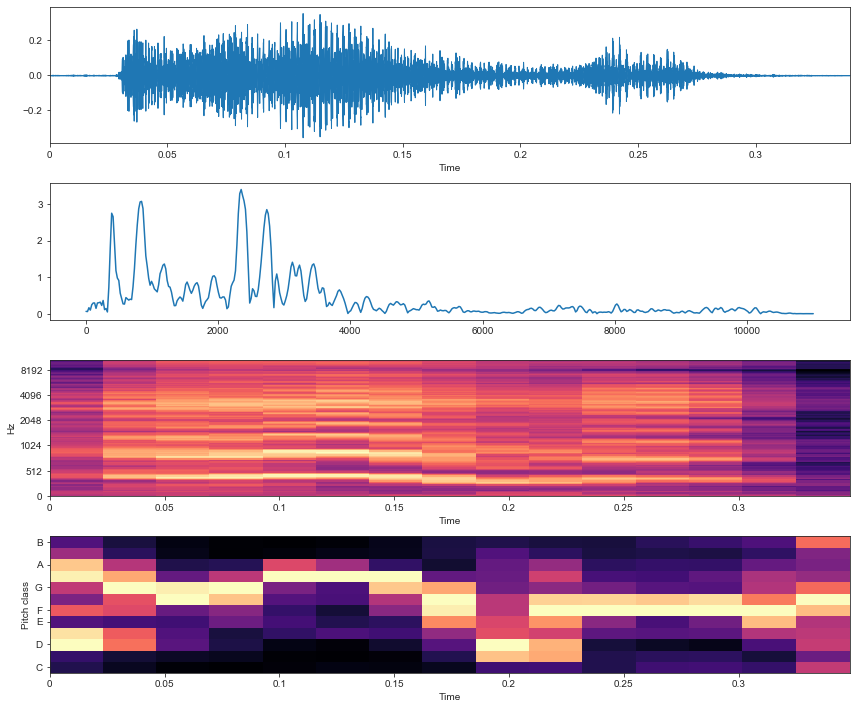

In [35]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [5]:
# Cat predicted as cat!
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.876cd66b.wav')
Audio(data=y, rate=sr)

In [7]:
# Dog predicted as cat 
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Bark/Bark.92fd0236.wav')
Audio(data=y, rate=sr)